## Example: Visualizing Seattle Bicycle Counts

As a more involved example of working with some time series data, let's take a look at bicycle counts on Seattle's [Fremont Bridge](http://www.openstreetmap.org/#map=17/47.64813/-122.34965).
This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.
The hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the [direct link to the dataset](https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k).

As of summer 2016, the CSV can be downloaded as follows:

Once this dataset is downloaded, we can use Pandas to read the CSV output into a ``DataFrame``.
We will specify that we want the Date as an index, and we want these dates to be automatically parsed:

In [1]:
# lee los datos en un DataFrame
import pandas as pd
data = pd.read_csv('https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


For convenience, we'll further process this dataset by shortening the column names:

In [3]:
# que las columnas se llamen 'Total','East', 'West'
data.columns = ['Total', 'East', 'West']
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


Now let's take a look at the summary statistics for this data:

In [4]:
data.head()

,Total,East,West
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


### Visualizing the data

We can gain some insight into the dataset by visualizing it.
Let's start by plotting the raw data:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn; seaborn.set()
import pandas.util.testing as tm

/opt/anaconda3/envs/TheBridgeBootcamp/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Hourly Bicicle Count')

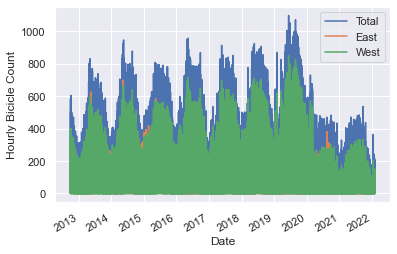

In [7]:
# haz un plot
data.plot()
plt.ylabel("Hourly Bicicle Count")

The ~25,000 hourly samples are far too dense for us to make much sense of.
We can gain more insight by resampling the data to a coarser grid.
Let's resample by month:

Text(0, 0.5, 'Hourly Bicicle Count')

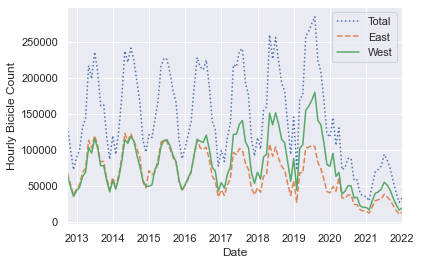

In [11]:
# muestrea por mes y en ese periodo calcula la suma
# pinta ese cálculo con puntos suspensivos para el total, rayado para el este y 
# con línea continua para el oeste

monthly= data.resample("M").sum()
monthly.plot(style=[':','--','-'])
plt.ylabel("Hourly Bicicle Count")

This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week (likely dependent on weather; see [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) where we explore this further).

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the ``pd.rolling_mean()`` function.
Here we'll do a 30 day rolling mean of our data, making sure to center the window:

Text(0, 0.5, 'Mean Bicicle Count')

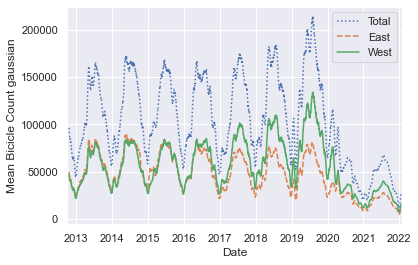

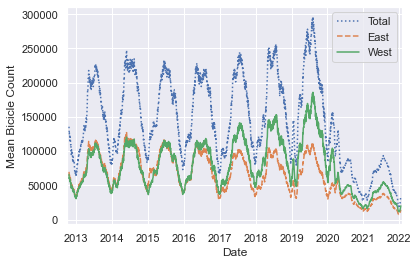

In [23]:
# haz una ventana deslizante de 30 días, calcula la suma y asóciala al centro de la ventana
daily = data.resample("D").sum()
daily.rolling(30, center= True, win_type="gaussian").sum(std=10).plot(style=[':','--','-'])
plt.ylabel("Mean Bicicle Count gaussian")
daily.rolling(30, center= True).sum().plot(style=[':','--','-'])
plt.ylabel("Mean Bicicle Count")

The jaggedness of the result is due to the hard cutoff of the window.
We can get a smoother version of a rolling mean using a window function–for example, a Gaussian window.
The following code specifies both the width of the window (we chose 50 days) and the width of the Gaussian within the window (we chose 10 days):

Text(0, 0.5, 'Mean Bicicle Count')

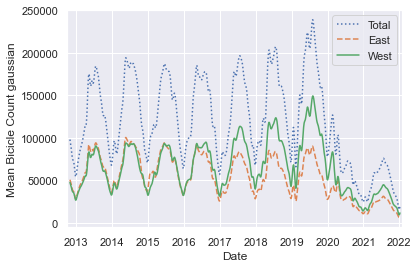

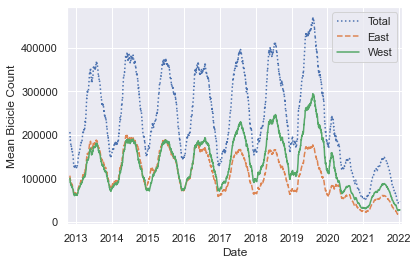

In [26]:
# usa ahora una ventana deslizante gaussiana de 50 días para suavizar más
daily = data.resample("D").sum()
daily.rolling(50, center= True, win_type="gaussian").sum(std=10).plot(style=[':','--','-'])
plt.ylabel("Mean Bicicle Count gaussian")
daily.rolling(50, center= True).sum().plot(style=[':','--','-'])
plt.ylabel("Mean Bicicle Count")

### Digging into the data

While these smoothed data views are useful to get an idea of the general trend in the data, they hide much of the interesting structure.
For example, we might want to look at the average traffic as a function of the time of day.
We can do this using the GroupBy functionality discussed in [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb):

In [27]:
# agrupamos por horas y calculamos la agregación (media) calculada entre todos los días
data.groupby(data.index.time).mean()


,Total,East,West
00:00:00,10.904021,4.579118,6.324903
01:00:00,5.764754,2.563067,3.201686
02:00:00,3.787618,1.803867,1.983750
03:00:00,2.797990,1.417964,1.380026
04:00:00,6.358787,3.307717,3.051565
05:00:00,24.761997,14.928502,9.833495
06:00:00,86.270752,51.093872,35.176881
07:00:00,216.038911,132.561284,83.477626
08:00:00,305.616894,178.060149,127.556744
09:00:00,180.881122,96.835712,84.045410


<AxesSubplot:xlabel='time'>

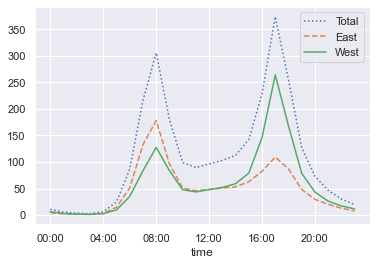

In [30]:
# mirando solo en las horas del día
# investiga qué sucede con el tráfico de bicicletas
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6) # saltos de 4 horas, 6 puntos diferentes

by_time.plot(xticks = hourly_ticks, style=[':','--','-'])

In [31]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(21, 0), datetime.time(22, 0), datetime.time(23, 0)],
      dtype=object)

The hourly traffic is a strongly bimodal distribution, with peaks around 8:00 in the morning and 5:00 in the evening.
This is likely evidence of a strong component of commuter traffic crossing the bridge.
This is further evidenced by the differences between the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening.

We also might be curious about how things change based on the day of the week. Again, we can do this with a simple groupby:

           Total       East       West
Date                                  
0     127.036417  56.156451  70.883318
1     135.703969  60.223385  75.480583
2     135.046407  59.959588  75.086819
3     128.240457  57.303713  70.936744
4     116.140776  51.880889  64.259886
5      65.339292  32.412930  32.926362
6      62.502606  31.475078  31.027528
            Total       East       West
Mon    127.036417  56.156451  70.883318
Tues   135.703969  60.223385  75.480583
Wed    135.046407  59.959588  75.086819
Thu    128.240457  57.303713  70.936744
Fri    116.140776  51.880889  64.259886
Satur   65.339292  32.412930  32.926362
Sun     62.502606  31.475078  31.027528


<AxesSubplot:>

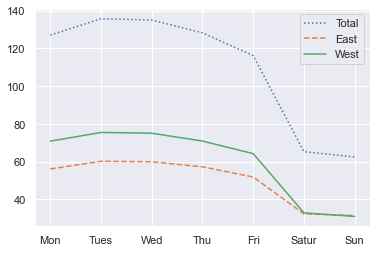

In [32]:
# agrupa ahora por día de la semana y calcula la media
by_weekday = data.groupby(data.index.dayofweek).mean()
print(by_weekday)
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thu', 'Fri', 'Satur', 'Sun']
print(by_weekday)
by_weekday.plot( style=[':','--','-'])


This shows a strong distinction between weekday and weekend totals, with around twice as many average riders crossing the bridge on Monday through Friday than on Saturday and Sunday.

With this in mind, let's do a compound GroupBy and look at the hourly trend on weekdays versus weekends.
We'll start by grouping by both a flag marking the weekend, and the time of day:

In [34]:
# investiga cómo se comprota el tráfico de biciletas según el día sea fin de semana o no y la hora
weekend = np.where(data.index.weekday < 5, 'Weekday', "Weekend")
weekend[70:75]

array(['Weekend', 'Weekend', 'Weekday', 'Weekday', 'Weekday'], dtype='<U7')

In [35]:
by_time = data.groupby([weekend, data.index.time]).mean()
by_time

Total        East        West
Weekday 00:00:00    9.076469    3.859995    5.216474
        01:00:00    4.505786    2.009076    2.496710
        02:00:00    2.997050    1.465396    1.531654
        03:00:00    2.580894    1.323576    1.257318
        04:00:00    7.426367    4.022237    3.404902
        05:00:00   31.766281   19.372589   12.393692
        06:00:00  114.026776   68.398003   45.628772
        07:00:00  289.448151  178.975494  110.472657
        08:00:00  403.890855  236.915135  166.975720
        09:00:00  220.241998  118.598184  101.643814
        10:00:00   97.989103   50.190465   47.798638
        11:00:00   76.341884   39.047900   37.293984
        12:00:00   80.039728   39.782974   40.256754
        13:00:00   86.405037   41.968913   44.436124
        14:00:00   98.195188   44.709487   53.485701
        15:00:00  140.200635   58.478665   81.721970
        16:00:00  266.174081   88.604630  177.569451
        17:00:00  478.786882  131.352247  347.434635
        18:00:00  323.010213  104.875170  218.135043
        19:00:00  154.853836   56.565819   98.288016
        20:00:00   85.892873   33.958466   51.934408
        21:00:00   53.668180   23.104176   30.564004
        22:00:00   33.841126   14.371993   19.469133
        23:00:00   21.134589    8.582615   12.551975
Weekend 00:00:00   15.477570    6.378762    9.098807
        01:00:00    8.915389    3.949461    4.965928
        02:00:00    5.781912    2.657699    3.124213
        03:00:00    3.341283    1.654174    1.687110
        04:00:00    3.687110    1.519591    2.167518
        05:00:00    7.233390    3.806928    3.426462
        06:00:00   16.809767    7.789324    9.020443
        07:00:00   32.328223   16.407155   15.921068
        08:00:00   59.680863   30.772288   28.908575
        09:00:00   82.423055   42.398637   40.024418
        10:00:00  101.570131   53.170926   48.399205
        11:00:00  123.415673   63.421352   59.994321
        12:00:00  137.116411   69.719478   67.396934
        13:00:00  144.893810   73.128336   71.765474
        14:00:00  148.639409   75.001704   73.637706
        15:00:00  146.609881   73.856332   72.753549
        16:00:00  134.170358   67.110165   67.060193
        17:00:00  110.392391   54.566156   55.826235
        18:00:00   84.624077   41.942078   42.681999
        19:00:00   57.609881   27.897785   29.712095
        20:00:00   41.144236   19.302101   21.842135
        21:00:00   29.346962   13.404884   15.942078
        22:00:00   21.625213    9.646792   11.978421
        23:00:00   16.834185    6.931289    9.902896

Now we'll use some of the Matplotlib tools described in [Multiple Subplots](04.08-Multiple-Subplots.ipynb) to plot two panels side by side:

In [ ]:
# pinta gráficas para ver el resultado más claro

The result is very interesting: we see a bimodal commute pattern during the work week, and a unimodal recreational pattern during the weekends.
It would be interesting to dig through this data in more detail, and examine the effect of weather, temperature, time of year, and other factors on people's commuting patterns; for further discussion, see my blog post ["Is Seattle Really Seeing an Uptick In Cycling?"](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/), which uses a subset of this data.
We will also revisit this dataset in the context of modeling in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).